In [1]:
import torch
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
frame = torch.load('full_year/tensors/2017-10-01_12;15;00-2017-10-01_12;30;00-2017-09-25_00;00;00-2017-10-02_00;00;00-p3-625.pkl')

frame.shape

torch.Size([69, 69, 3])

In [3]:
frame.view([1, -1]).shape

torch.Size([1, 14283])

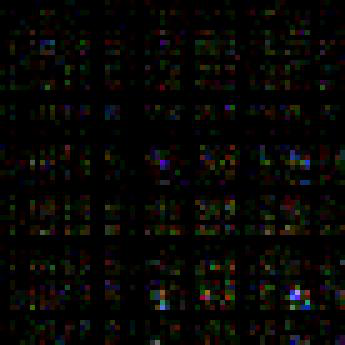

In [4]:
from PIL import Image

fviz = Image.open('full_year/viz_images/2017-10-01_12;15;00-2017-10-01_12;30;00-2017-09-25_00;00;00-2017-10-02_00;00;00-p3-625.jpg')
fviz

In [5]:
def get_channel(image, layer:str):
    '''
    Get a layer of the snapshot.
    Params:
        image: PIL image
        channel: one of R-F,G-P,B-N
    Return:
        single channel image
    '''
    assert layer in ['P', 'N', 'F']
    namedict = {'P': 'G', 'N': 'B', 'F': 'R'}
    chandict = {'R':0, 'G':1, 'B':2}
    template = np.array(image)
    chan = np.zeros([*template.shape], dtype='uint8')
    chan[:,:,chandict[namedict[layer]]] = image.getchannel(namedict[layer])
    chan = Image.fromarray(chan)
    return chan

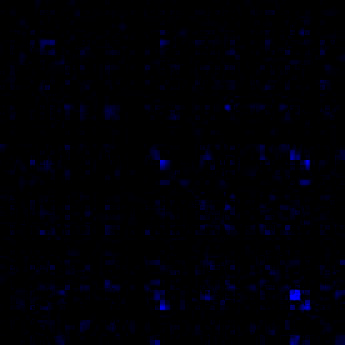

In [6]:
get_channel(fviz, 'N')
# fviz.getchannel('B')

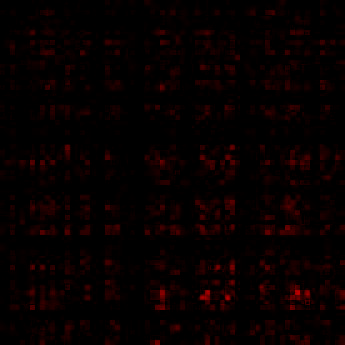

In [7]:
get_channel(fviz, 'F')
# fviz.getchannel('R')

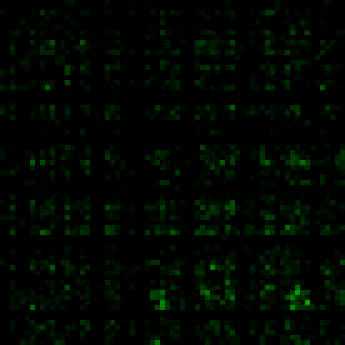

In [8]:
get_channel(fviz, 'P')
# fviz.getchannel('G')

In [9]:
conv1 = torch.nn.Conv2d(3, 33, 5, 2)
conv2 = torch.nn.Conv2d(33, 64, 3, 2)

frame = frame.view([1, 3, 69, 69])
frame.double()
frame.requires_grad

False

In [10]:
conv1.weight = torch.nn.Parameter(conv1.weight.double(), requires_grad=False)
conv1.bias = torch.nn.Parameter(conv1.bias.double(), requires_grad=False)
conv2.weight = torch.nn.Parameter(conv2.weight.double(), requires_grad=False)
conv2.bias = torch.nn.Parameter(conv2.bias.double(), requires_grad=False)

In [11]:
out = conv1(frame)
last = conv2(out)

In [12]:
out

tensor([[[[ 6.9041e+00,  4.6029e-01,  3.2773e+00,  ...,  3.2337e+00,
            2.9848e-01, -4.2002e+00],
          [-4.4622e+00, -4.8475e+00, -3.6802e+00,  ..., -2.3483e+00,
           -2.9166e+00, -4.3297e+00],
          [ 3.3860e-01,  1.5528e+00,  3.1538e+00,  ...,  2.1678e+00,
            1.9569e+00,  1.4961e+00],
          ...,
          [-4.7096e+00, -2.1786e-02, -4.1115e+00,  ...,  4.5856e+00,
           -8.2161e+00, -1.5143e+01],
          [ 5.1774e-01, -3.3113e+00,  3.3507e+00,  ..., -1.4428e+01,
            1.4704e+00,  1.8846e+01],
          [ 6.3181e+00,  1.2121e+00,  2.8591e+00,  ..., -9.0548e+00,
           -6.7042e-02,  1.2175e+01]],

         [[ 8.7209e+00, -5.9545e-01,  3.8579e+00,  ...,  2.1560e-01,
           -3.3986e+00, -8.5172e+00],
          [-4.8977e+00, -1.6029e+00,  4.0739e+00,  ..., -9.5708e-01,
           -1.6425e+00,  3.2189e+00],
          [-1.0026e+00, -1.3332e+00, -2.4632e+00,  ..., -4.7583e+00,
           -3.4498e+00, -3.7572e-01],
          ...,
     

In [13]:
out.shape

torch.Size([1, 33, 33, 33])

In [14]:
last.shape

torch.Size([1, 64, 16, 16])

In [15]:
# temp = out[:,:3,:,:].detach().numpy().reshape([33,33,3]).astype('int8')
temp = out.view((33,33,33))
temp = temp.permute(2,1,0)
temp.shape

torch.Size([33, 33, 33])

In [16]:
last = last.view((64, 16, 16))
last = last.permute(2,1,0)

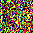

In [26]:
Image.fromarray(temp.numpy()[:,:,:3].astype('uint8'))

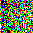

In [18]:
Image.fromarray(temp.numpy()[:,:,3:6].astype('uint8'))

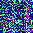

In [19]:
Image.fromarray(temp.numpy()[:,:,6:9].astype('uint8'))

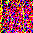

In [20]:
Image.fromarray(temp.numpy()[:,:,9:12].astype('uint8'))

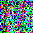

In [25]:
Image.fromarray(temp.numpy()[:,:,12:15].astype('uint8'))

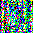

In [27]:
Image.fromarray(temp.numpy()[:,:,15:18].astype('uint8'))

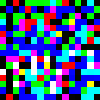

In [23]:
Image.fromarray(last.numpy()[:,:,0:3].astype('uint8')).resize((100,100))

'''
Copyright <2019> <COPYRIGHT Pingcheng Zhang>

Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies
of the Software, and to permit persons to whom the Software is furnished to do
so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY,
WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

##============================================================================##